# Feed-forward сети

Итак, давайте потренируемся тренировать нейронные сети прямого распространения (так как делали на паре)
При этом попробуем создать свою функцию активации на одном из слоев

In [1]:
# Сделаем необходимые импорты
import torch
import numpy as np
from torch import nn
from torch import optim
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision
import matplotlib.pyplot as plt


In [2]:
# Загрузим датасет CIFAR-10, сразу же создадим dataloader для него
train_dataset = torchvision.datasets.CIFAR10(root='data/',
                                             train=True,  
                                             transform=transforms.ToTensor(), 
                                             download=True)


image, label = train_dataset[0]
print (image.size())
print (label)


Files already downloaded and verified
torch.Size([3, 32, 32])
6


In [3]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=64, 
                                           shuffle=True)

In [4]:
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=4,
                                         shuffle=False)

Files already downloaded and verified


In [5]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

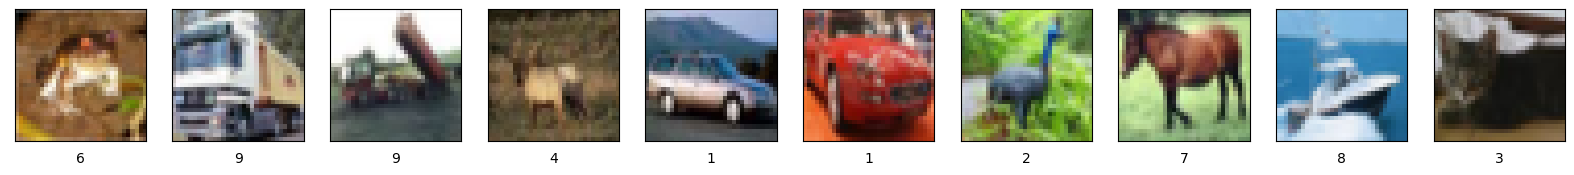

In [6]:
plt.figure(figsize=(20, 3))

for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image, label = train_dataset[i]
    plt.imshow(image.permute(1, 2, 0).numpy())
    plt.xlabel(label)
    
plt.show()

In [7]:
# Создайте собственную архитектуру! Можете использовать все, что угодно, но в ограничении на использование линейные слои (пока без сверток)
# Давайте добавим ограниченный Leaky_relu, то есть output = max(0.1x, 0.5x)
# Ваша задача добавить его в архитектуру сети как функцию активации

class Net(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 8 * hidden_dim)
        self.fc2 = nn.Linear(8 * hidden_dim, 4 * hidden_dim)
        self.fc3 = nn.Linear(4 * hidden_dim, 2 * hidden_dim)
        self.fc4 = nn.Linear(2 * hidden_dim, hidden_dim)
        self.fc5 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.leaky_relu(x, 0.05)
        x = self.fc2(x)
        x = F.leaky_relu(x, 0.05)
        x = self.fc3(x)
        x = F.leaky_relu(x, 0.05)
        x = self.fc4(x)
        x = F.leaky_relu(x, 0.05)
        x = self.fc5(x)
        #x = F.softmax(x)
        return x

    def predict(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.leaky_relu(x, 0.05)
        x = self.fc2(x)
        x = F.leaky_relu(x, 0.05)
        x = self.fc3(x)
        x = F.leaky_relu(x, 0.05)
        x = self.fc4(x)
        x = F.leaky_relu(x, 0.05)
        x = self.fc5(x)
        x = F.softmax(x)
        return x

In [8]:
net = Net(3072, 100, 10)

In [9]:
# Запустить обучение (по аналогии с тем, что делали на паре)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [10]:
net.train()

Net(
  (fc1): Linear(in_features=3072, out_features=800, bias=True)
  (fc2): Linear(in_features=800, out_features=400, bias=True)
  (fc3): Linear(in_features=400, out_features=200, bias=True)
  (fc4): Linear(in_features=200, out_features=100, bias=True)
  (fc5): Linear(in_features=100, out_features=10, bias=True)
)

In [11]:
num_epochs = 10

for epoch in range(num_epochs):
    running_loss = 0
    running_items = 0

    for i, data in enumerate(train_loader):
        inputs, labels = data[0], data[1]

        # обнуляем градиент
        optimizer.zero_grad()
        # делаем предсказание
        outputs = net(inputs)
        # рассчитываем лосс-функцию
        loss = criterion(outputs, labels)
        # делаем шаг назад по лоссу
        loss.backward()
        # делаем шаг нашего оптимайзера
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        running_items += len(labels)
        if i % 300 == 0:
            print(f'Epoch: [{epoch+1}/{num_epochs}]. ' \
                  f'Step: [{i+1}/{len(train_loader)}]. '\
                  f'Loss: {round(running_loss/running_items, 3)}')
            
print('Training is finished!')

Epoch: [1/10]. Step: [1/782]. Loss: 0.036
Epoch: [1/10]. Step: [301/782]. Loss: 0.032
Epoch: [1/10]. Step: [601/782]. Loss: 0.03
Epoch: [2/10]. Step: [1/782]. Loss: 0.026
Epoch: [2/10]. Step: [301/782]. Loss: 0.028
Epoch: [2/10]. Step: [601/782]. Loss: 0.027
Epoch: [3/10]. Step: [1/782]. Loss: 0.025
Epoch: [3/10]. Step: [301/782]. Loss: 0.026
Epoch: [3/10]. Step: [601/782]. Loss: 0.026
Epoch: [4/10]. Step: [1/782]. Loss: 0.022
Epoch: [4/10]. Step: [301/782]. Loss: 0.024
Epoch: [4/10]. Step: [601/782]. Loss: 0.024
Epoch: [5/10]. Step: [1/782]. Loss: 0.02
Epoch: [5/10]. Step: [301/782]. Loss: 0.024
Epoch: [5/10]. Step: [601/782]. Loss: 0.024
Epoch: [6/10]. Step: [1/782]. Loss: 0.022
Epoch: [6/10]. Step: [301/782]. Loss: 0.023
Epoch: [6/10]. Step: [601/782]. Loss: 0.023
Epoch: [7/10]. Step: [1/782]. Loss: 0.021
Epoch: [7/10]. Step: [301/782]. Loss: 0.023
Epoch: [7/10]. Step: [601/782]. Loss: 0.022
Epoch: [8/10]. Step: [1/782]. Loss: 0.02
Epoch: [8/10]. Step: [301/782]. Loss: 0.022
Epoch: 

In [12]:
data_iter = iter(test_loader)
images, labels = next(data_iter)

true classes:  cat ship ship plane


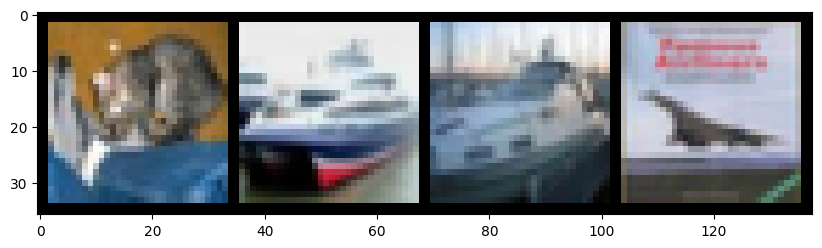

In [13]:
net.eval()
outputs = net(images)
imgs = torchvision.utils.make_grid(images)
plt.figure(figsize=(10, 5))
plt.imshow(imgs.permute(1, 2, 0).numpy())
tc = np.array([classes[labels[i]] for i in range(len(labels))])
print("true classes: ", " ".join(tc))